In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

In [ ]:
def matrix_game(size):
    matrix = np.full((size,size), '#', dtype=str) 
    #Creates an n x n matrix full of '#' so the entries can be inputted

    # Display the initial matrix with '#'
    print("\nCurrent Matrix:")
    display(matrix)

    # Alternate turns between the player and the computer
    for turn in range(size**2): # Sets up for loop for each turn and total number is n^2
        if turn % 2 == 0:   # I used modulo 2 to keep consitent with the 0 and 1 entries
            player = '0'  # I play and fill with "0"
            print("\nMy turn:")
            while True:
                    row = int(input(f"Enter row (0 to {size-1}): "))   # Allows for entry of row number
                    col = int(input(f"Enter column (0 to {size-1}): ")) # Allows for entry of column number
                    if matrix[row, col] == '#':
                        break                       # Here we get the while loop to break when a # is replaced by a 0
                    else:
                        print("Cell is already filled. Try again.")  #If we have a cell that is already filled then it'll repeat the question
        else:
            player = '1'  # Computer plays and fills with "1"
            empty = [(i, j) for i in range(size) for j in range(size) if matrix[i, j] == '#']  
            if empty: # Defines the empty cells as the ones with # in the current matrix
                row, col = np.random.default_rng().choice(empty)  #Using a randomiser computer picks the row and column
            else:
                print("No empty cells left") # This signals the end of the game 
                continue
            print("\nComputer's turn:")
            print(f"Computer played at row {row}, column {col}") # Outputs the position the computer played at 

        matrix[row, col] = player  # Updates the matrix entries
        print("\nCurrent Matrix:")   #Prints the current matrix 
        display(matrix)

    return matrix

def winner(matrix): # Now we define the winner of this game
    determinant = np.linalg.det([[int(cell) if cell != '#' else 0 for cell in row] for row in matrix]) 
    if determinant == 0: # The determinant is calculated by taking the integer value off each entry iterated over every row in the matrix
        return "I win! The determinant is zero."
    else: # Then output the two different options i.e. if determinant is anything but zero computer wins.
        return "Computer wins! The determinant is non-zero."

def display(matrix):  # Display the matrix at each stage
    for i in range(matrix.shape[0]):  # This prints a matrix with the correct number of rows
        for j in range(matrix.shape[1]): # This prints a matrix with the correct number of columns
            print(matrix[i, j], end=' ')
        print()

size = int(input("Enter the size, n  of the n x n matrix : ")) # Get user to input matrix size
final = matrix_game(size) #Obtain the final matrix to put into winner function and define a message
message = winner(final)

# Print the final matrix and the winner message
print("\nFinal Matrix:")
display(final)
print(message)

Enter the number of zeros in the matrix (0 to 9):  4


Total possibilities: 126
Number of determinants equal to zero: 54


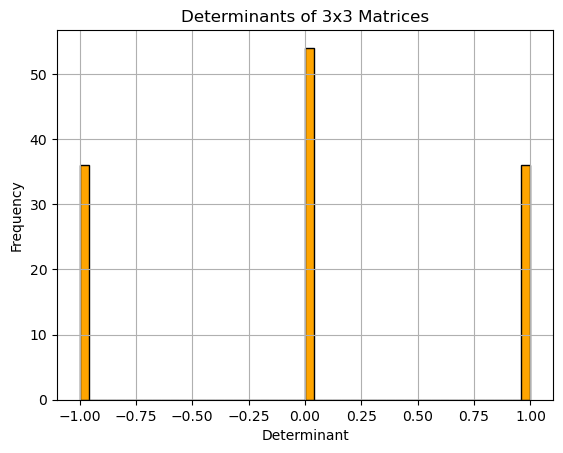

In [6]:
def number(zeros):   #Define the function with 3 variables similar to Week 3 Lab
    matrices = []
    possibilities = 0
    zero_determinants = 0

    for perm in set(permutations([0]*zeros + [1]*(9-zeros))): # One skill I learnt during a python course I did before this module to refresh my memory
        matrix = np.array(perm).reshape((3, 3))   # I used itertools to create a permutation to loop through all possibilities for 0's and 1's
        determinant = np.linalg.det(matrix)  # The permutation essentially writes 9 numbers in a row and reshapes into a matrix and determinant is calculated
        
        possibilities += 1
        if determinant == 0:  # Adds zero determinants to the count and 1 to the possibilities
            zero_determinants += 1

        matrices.append(matrix) # Appends the matrix to the list so we don't repeat it

    return matrices, possibilities, zero_determinants

def plot_histogram(determinants): #Plots all determinants on a histogram
    plt.hist(determinants, bins=50, alpha=1, color='orange', edgecolor='black')
    plt.title('Determinants of 3x3 Matrices')
    plt.xlabel('Determinant')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


zeros = int(input("Enter the number of zeros in the matrix (0 to 9): "))
matrices, total, zero_determinants = number(zeros)  # Allows inital input of zeroes and ones so I can change it to 4 or 5 depedning on who starts

print(f'Total possibilities: {total}') # Total possibilities are presented and of these how many are 0 determinant
print(f'Number of determinants equal to zero: {zero_determinants}')

determinants = [np.linalg.det(matrix) for matrix in matrices]
plot_histogram(determinants) # Defined in the function